In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

## Solution of an ODE

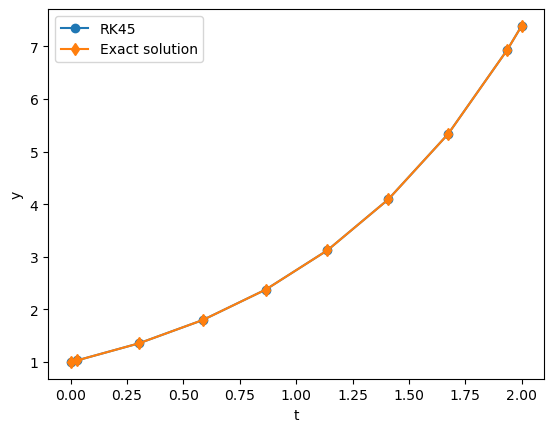

In [66]:
def f(t, y):
    return y
    
a = 0.0; b = 2.0
tspan = [a, b]
y0 = [1.0]

# solve
sol = solve_ivp(f, tspan, y0, 'RK45', rtol=1.e-6)

# Plot the results
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(sol.t, sol.y[0], '-o', label="RK45")
axes.plot(sol.t, np.exp(sol.t), '-d', label="Exact solution")
axes.set_xlabel("t"); axes.set_ylabel("y"); axes.legend(loc=2);
plt.show()

## Solution of a System of ODEs

### Population Model: Pray - Predator Model

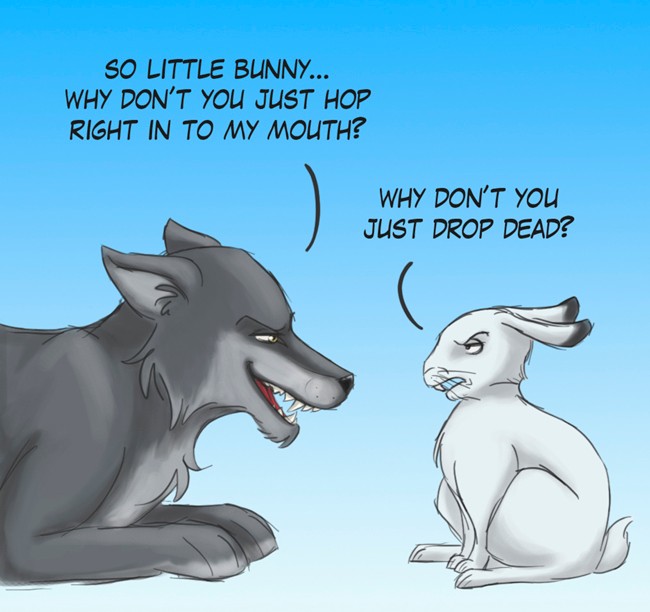

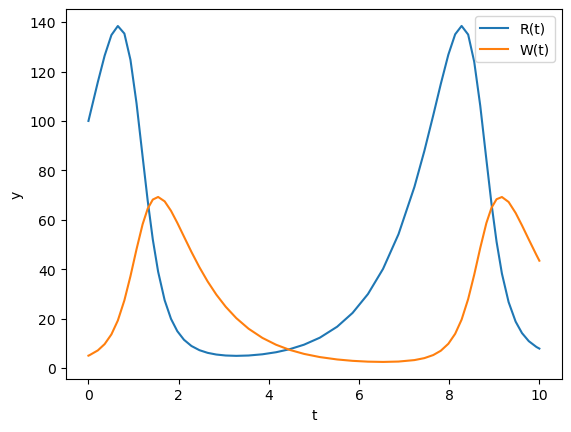

In [67]:
# Define the right-hand side and input parameters
def f(t, y, a, b, c, d):
    R = y[0]
    W = y[1]
    drdt = a*R - b*R*W
    dwdt = c*R*W - d*W
    return [drdt, dwdt]


tstart = 0.0; tend = 10.0; tspan = [tstart, tend]
y0 = [100, 5]
a, b, c, d = 1, 0.05, 0.025, 1.0
args1=(a, b, c, d)

# Solve the ODE
sol1 = solve_ivp(f, tspan, y0, 'RK45', args=args1, rtol=1.e-6)

# Plot the results
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(sol1.t, sol1.y[0], label="R(t)")
axes.plot(sol1.t, sol1.y[1], label="W(t)")
axes.set_xlabel("t"); axes.set_ylabel("y"); axes.legend(loc=1); plt.show()

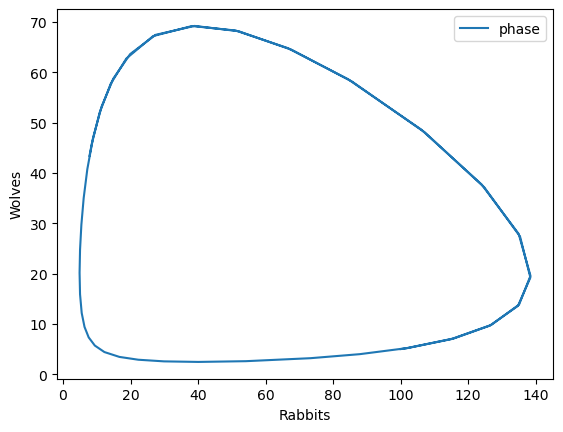

In [68]:
# Phase Plot
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(sol1.y[0], sol1.y[1], label="phase")
axes.set_xlabel("Rabbits"); axes.set_ylabel("Wolves"); axes.legend(loc=1); plt.show()

### Infectious Disease Spread (e.g. COVID-19): SIR Model
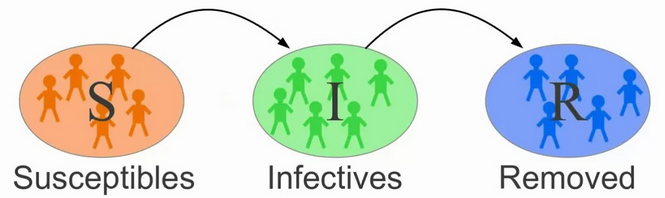

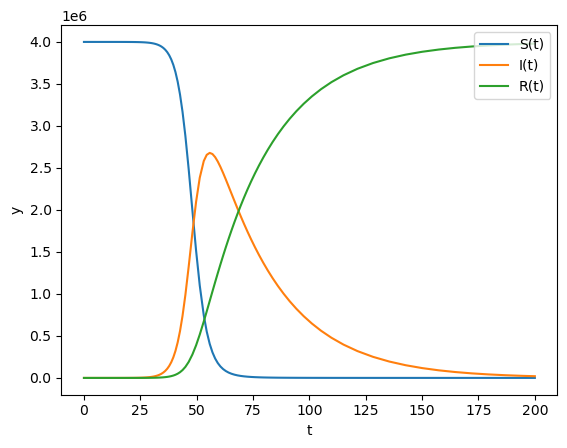

In [65]:
# Define the right-hand side and input parameters
def f(t, y, beta, gamma, N):
    z = np.zeros(3)
    z[0]=-beta/N * y[0] * y[1]
    z[1]= beta/N * y[0] * y[1] - gamma * y[1]
    z[2]= gamma * y[1]
    return z

beta = 0.35; gamma = 0.035
N = 4.e+6; a = 0.0; b = 200.0; tspan = [a, b]
y0 = [N-1, 1, 0]
args1=(beta, gamma, N)

# Solve the ODE
sol1 = solve_ivp(f, tspan, y0, 'RK45', args=args1, rtol=1.e-6)

# Plot the results
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(sol1.t, sol1.y[0], label="S(t)")
axes.plot(sol1.t, sol1.y[1], label="I(t)")
axes.plot(sol1.t, sol1.y[2], label="R(t)")
axes.set_xlabel("t"); axes.set_ylabel("y"); axes.legend(loc=1); plt.show()